## Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.

## 
Linear Regression:

Linear regression is a supervised learning algorithm used for predicting continuous numerical values (quantitative output). It establishes a linear relationship between the dependent variable (target) and one or more independent variables (features) by fitting a straight line to the data points. The goal of linear regression is to find the best-fitted line that minimizes the sum of the squared errors between the predicted values and the actual values.

Logistic Regression:

Logistic regression is also a supervised learning algorithm, but it is used for predicting binary outcomes (categorical output with two classes, e.g., 0 or 1, True or False, Yes or No). It estimates the probability that an instance belongs to a particular class based on its features. Logistic regression applies a logistic (sigmoid) function to the linear combination of features to transform the output to the range of [0, 1], representing the probability of belonging to one class.

Key Differences:

Output Type:

Linear regression predicts continuous numerical values (e.g., predicting house prices, stock prices).
Logistic regression predicts binary categorical outcomes (e.g., classifying whether an email is spam or not, whether a customer will churn or not).

Model Function:

Linear regression uses a linear function to model the relationship between features and the target.
Logistic regression uses the logistic (sigmoid) function to model the probability of belonging to a class.

Loss Function:

Linear regression typically uses Mean Squared Error (MSE) as the loss function.
Logistic regression uses Log Loss (Cross-Entropy) as the loss function.

Interpretation of Output:

In linear regression, the coefficients represent the change in the target variable for a one-unit change in the corresponding feature.

In logistic regression, the coefficients represent the change in the log-odds of the target belonging to a particular class for a one-unit change in the corresponding feature.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'BMI': [22.1, 23.5, 27.2, 29.0, 31.8, 26.5, 28.3, 29.9],
    'Diabetes': [0, 0, 1, 1, 1, 0, 1, 1]  # 1 for diabetic, 0 for non-diabetic
})

# Split the data into features (X) and target (y)
X = data[['Age', 'BMI']]
y = data['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


## Q2. What is the cost function used in logistic regression, and how is it optimized?

##
In logistic regression, the cost function used is the "Log Loss" or "Cross-Entropy" loss function. The purpose of the cost function is to quantify how well the model's predicted probabilities match the actual binary class labels in the training data.

The mathematical representation of the cost function (logistic loss) for logistic regression is as follows:

Cost function (Logistic Loss):


Cost(y_true, y_pred) = - (1/n) * Σ [y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)]

where:

y_true is the true binary class label (0 or 1) for a data point.
y_pred is the predicted probability of the positive class (class 1) for the same data point.
n is the total number of data points in the training set.
The cost function penalizes the model more when its predicted probability (y_pred) deviates from the true class label (y_true). It approaches zero when the predicted probability closely matches the true label and increases as the predictions diverge from the true labels.

Optimization:

The goal in logistic regression is to find the optimal values for the model's coefficients (weights) that minimize the overall cost function over the entire training dataset. This process is known as "optimization" or "training" of the logistic regression model.

One common optimization algorithm used in logistic regression is "Gradient Descent." The gradient descent algorithm iteratively updates the model's coefficients in the opposite direction of the cost function's gradient to find the minimum of the cost function. This process continues until the cost function reaches a minimum or converges to a stable value.

In [ ]:
Cost(y_true, y_pred) = - (1/n) * Σ [y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)]

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data for binary classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

## Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

##

In logistic regression, regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. Overfitting occurs when the model is too complex and fits the training data too closely, capturing noise and fluctuations that are not representative of the underlying pattern. As a result, the overfitted model performs well on the training data but poorly on unseen data (test data).

Regularization helps in controlling the complexity of the model by discouraging the model from assigning excessively large weights to the features. It achieves this by adding a penalty term to the cost function that increases as the model's coefficients (weights) become larger. The regularization term is scaled by a hyperparameter, often denoted as "λ" (lambda), which controls the strength of regularization.

The two most common types of regularization used in logistic regression are L1 regularization (Lasso) and L2 regularization (Ridge):


L1 Regularization (Lasso):

In L1 regularization, the penalty term is proportional to the absolute values of the model's coefficients. The L1 penalty encourages sparsity in the model, as it tends to drive some coefficients to exactly zero. Consequently, L1 regularization can effectively perform feature selection by excluding less important features from the model.

L2 Regularization (Ridge):

In L2 regularization, the penalty term is proportional to the square of the model's coefficients. The L2 penalty discourages extreme values of coefficients and encourages all coefficients to be small. It has a shrinking effect on the coefficients, which can help reduce the impact of irrelevant or noisy features.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data for binary classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model with L2 regularization
logistic_model = LogisticRegression(penalty='l2', C=0.1)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

## Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

##
The ROC (Receiver Operating Characteristic) curve is a graphical representation that evaluates the performance of a binary classification model, such as logistic regression, at various classification thresholds. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) as the classification threshold changes.

True Positive Rate (TPR):
The true positive rate, also known as sensitivity or recall, is the proportion of positive instances correctly identified by the model out of all actual positive instances.

False Positive Rate (FPR):
The false positive rate is the proportion of negative instances incorrectly classified as positive by the model out of all actual negative instances.

Construction of ROC Curve:
To construct the ROC curve, the logistic regression model is first used to make predictions on the test data. Then, the classification threshold is varied from 0 to 1, and for each threshold, the TPR and FPR are calculated. The TPR and FPR values are then plotted on the ROC curve.

A perfect classifier would have an ROC curve that passes through the top-left corner of the plot, representing a TPR of 1 and an FPR of 0. A random classifier would have an ROC curve that approximates the diagonal line from the bottom-left to the top-right corners, indicating similar TPR and FPR values regardless of the threshold.

Area Under the ROC Curve (AUC-ROC):
The Area Under the ROC Curve (AUC-ROC) is a single scalar value that represents the overall performance of the binary classification model. It quantifies the model's ability to distinguish between the two classes, with higher AUC-ROC values indicating better performance.

A perfect classifier would have an AUC-ROC of 1, while a random classifier would have an AUC-ROC close to 0.5 (due to the diagonal line on the ROC curve).

Using ROC Curve to Evaluate Logistic Regression Model in Python:
In Python, you can use libraries like scikit-learn to calculate and plot the ROC curve for a logistic regression model. Here's an example

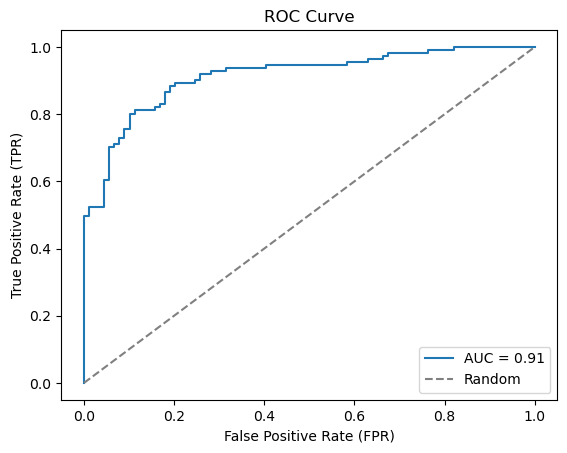

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Generate sample data for binary classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

##
Feature selection is an essential step in logistic regression to identify the most relevant and informative features for building an accurate model. Selecting the right set of features can lead to improved model performance, reduced complexity, and enhanced interpretability. Several common techniques for feature selection in logistic regression are:

Univariate Feature Selection:

Univariate feature selection techniques evaluate each feature independently, considering their relationship with the target variable. Common methods include chi-squared test, ANOVA (Analysis of Variance), and mutual information. Features with high statistical significance or strong information gain are selected.

Recursive Feature Elimination (RFE):

RFE is an iterative feature selection technique that recursively removes less important features from the model. It fits the model, evaluates the importance of each feature, removes the least important one, and repeats the process until the desired number of features is reached.

L1 Regularization (Lasso):

L1 regularization adds a penalty term to the cost function that encourages some model coefficients to become exactly zero. This leads to sparse solutions and effectively performs feature selection by excluding less important features from the model.

L2 Regularization (Ridge):

L2 regularization adds a penalty term to the cost function that discourages large coefficients. It has a shrinking effect on the coefficients, which can help reduce the impact of irrelevant or noisy features.

Feature Importance from Trees:

Tree-based models like Random Forest and Gradient Boosting can provide feature importance scores based on how often each feature is used to split the data. Features with higher importance scores are considered more relevant for the classification task.

Correlation-based Feature Selection:

Features that have a high correlation with the target variable are often considered more important. Correlation analysis helps identify features that have a strong linear relationship with the target.

Embedded Methods:

Some models, like LASSO and Elastic Net, perform feature selection as part of the training process. They automatically assign zero coefficients to less important features, effectively excluding them from the model.

Stepwise Selection:

Stepwise selection techniques, such as forward selection and backward elimination, add or remove features from the model based on a predefined criterion (e.g., p-value, AIC, BIC).

These feature selection techniques help improve the logistic regression model's performance in several ways:

Reduced Overfitting: By selecting only the most relevant features, the model is less likely to overfit to noise and irrelevant information in the data, resulting in better generalization to unseen data.

Simpler Model: Using a subset of relevant features simplifies the model, making it easier to interpret and understand the relationships between the features and the target variable.

Improved Performance: By focusing on the most informative features, the model can better capture the underlying patterns in the data, leading to improved predictive performance and higher accuracy.

## Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

## 
Handling imbalanced datasets in logistic regression is crucial because an unequal distribution of classes can lead to biased model training and poor generalization. In imbalanced datasets, the model may become overly biased toward the majority class, resulting in lower accuracy for the minority class. Several strategies can be employed in Python to deal with class imbalance in logistic regression:

Resampling Techniques:

Oversampling: Increase the number of instances in the minority class by randomly duplicating existing samples or generating synthetic samples. Popular oversampling techniques include Random Over-Sampling, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling).
Undersampling: Reduce the number of instances in the majority class by randomly removing samples. Care should be taken to ensure that the dataset remains representative. Common undersampling methods include Random Under-Sampling and Tomek links.
Class Weights:
Many implementations of logistic regression (e.g., scikit-learn) allow you to assign different weights to classes. By setting higher weights for the minority class, you can make the model pay more attention to it during training.

Anomaly Detection Techniques:
Treat the minority class as an anomaly detection problem and use techniques like One-Class SVM or Isolation Forest to identify and classify instances that deviate from the majority class.

Ensemble Methods:
Utilize ensemble methods like Random Forest and Gradient Boosting that can handle class imbalance naturally. These methods give more weight to the minority class by aggregating predictions from multiple weak learners.

Cost-Sensitive Learning:
Modify the optimization objective to include a cost matrix that penalizes misclassifying minority class samples more heavily than majority class samples.

Generate Synthetic Samples:
If using deep learning libraries like TensorFlow or Keras, you can use techniques like data augmentation during training to create synthetic samples for the minority class.

Custom Evaluation Metrics:
Use custom evaluation metrics like F1-score, precision-recall curve, or area under the precision-recall curve (AUC-PR) instead of accuracy. These metrics are more informative for imbalanced datasets.

Stratified Cross-Validation:
When performing cross-validation, use stratified sampling to ensure that each fold maintains the original class distribution, allowing the model to learn from both classes effectively.

Adjust Decision Threshold:
Instead of using the default threshold of 0.5 for class predictions, adjust it based on the trade-off between precision and recall to prioritize the desired metric.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Generate imbalanced sample data for binary classification
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the logistic regression model on the resampled data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

## Q7. Can you discuss some common issues and challenges that may arise when implementing logisticregression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

##
 Here are some common ones and potential strategies to address them in Python:

1. Multicollinearity:

Multicollinearity occurs when two or more independent variables are highly correlated, leading to unstable coefficient estimates. This can make it challenging to identify the true impact of each variable on the target. To address multicollinearity:

Check for correlation between independent variables using techniques like correlation matrices or variance inflation factor (VIF) analysis.

Remove one of the correlated variables or perform dimensionality reduction techniques like Principal Component Analysis (PCA).

2. Imbalanced Data:

Class imbalance can lead to biased models, especially in logistic regression. As discussed earlier, you can handle this by using techniques such as oversampling, undersampling, class weights, or ensemble methods like Random Forest or Gradient Boosting.

3. Overfitting:

Overfitting occurs when the model performs well on the training data but poorly on unseen data. To prevent overfitting:

Use regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients and reduce model complexity.

Employ cross-validation to tune hyperparameters and select the best model.

4. Outliers:

Outliers can disproportionately influence the model's coefficients, leading to biased results. Strategies to handle outliers include:

Detect and remove outliers using techniques like Z-score, IQR (Interquartile Range), or visual inspection with scatter plots.

5. Missing Data:

Missing data in the independent variables can cause issues during model training. Some approaches to handling missing data are:

Imputation: Replace missing values with mean, median, or most frequent value of the feature.

Create a separate category for missing values in categorical variables.

6. Non-Linear Relationships:

Logistic regression assumes a linear relationship between the independent variables and the log-odds of the target. If the relationship is non-linear, you can:

Perform feature engineering to create new features that capture non-linear relationships.

Use polynomial features to model higher-order relationships.

Consider using non-linear models like decision trees or SVM (Support Vector Machine).

7. Interpretability:

Though logistic regression is relatively interpretable, having many features can complicate interpretability.

To improve interpretability:

Use regularization to shrink less important coefficients towards zero.

Focus on interpreting the coefficients' signs and magnitudes relative to each other.
8. Model Validation and Performance Metrics:

Carefully choose appropriate evaluation metrics for model performance, especially in imbalanced datasets. Consider using precision, recall, F1-score, ROC-AUC, or PR-AUC instead of accuracy.

Remember that different challenges may require different approaches based on the specific characteristics of your data and the goals of your analysis. Python libraries like scikit-learn and statsmodels provide various tools for addressing these issues, and using these libraries efficiently can help you overcome these challenges in logistic regression implementation.